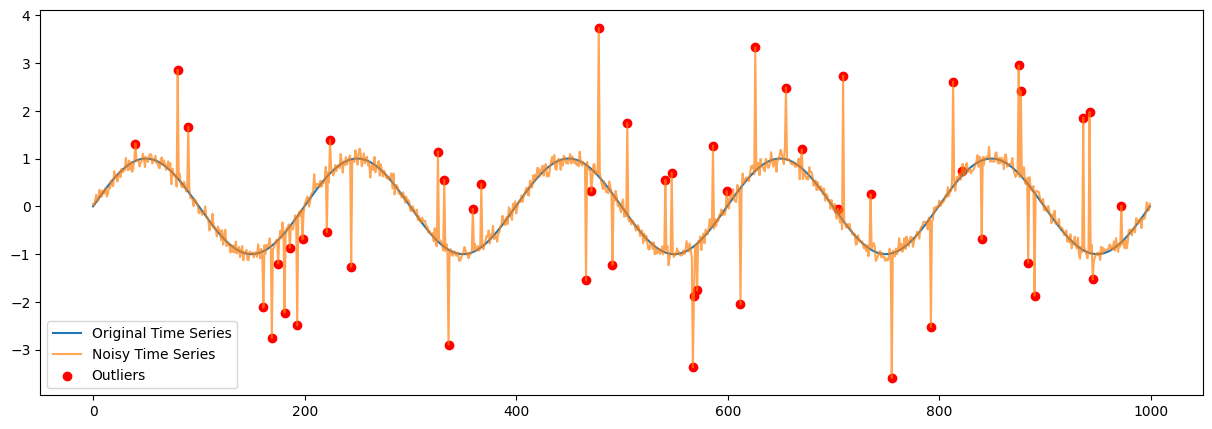

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo chuỗi thời gian giả lập (dạng sin)
np.random.seed(42)
time_series = np.sin(np.linspace(0, 10 * np.pi, 1000))  # Chuỗi sin gốc

# Thêm nhiễu Gaussian (trắng)
noise = np.random.normal(0, 0.1, size=len(time_series))
time_series_noisy = time_series + noise

# Thêm outliers (giá trị bất thường)
outlier_indices = np.random.choice(len(time_series), size=50, replace=False)
time_series_noisy[outlier_indices] += np.random.uniform(-3, 3, size=len(outlier_indices))

# Vẽ dữ liệu gốc và dữ liệu có nhiễu
plt.figure(figsize=(15, 5))
plt.plot(time_series, label="Original Time Series")
plt.plot(time_series_noisy, label="Noisy Time Series", alpha=0.7)
plt.scatter(outlier_indices, time_series_noisy[outlier_indices], color='red', label="Outliers")
plt.legend()
plt.show()


In [3]:
# Ghi nhận noisy_indices (chỉ số của tất cả các điểm bị nhiễu)
noisy_indices = np.unique(outlier_indices)
print("Noisy indices:", noisy_indices)

Noisy indices: [ 40  80  90 161 169 175 181 186 193 198 221 224 244 326 332 336 359 367
 466 471 478 491 505 541 547 567 568 571 586 599 612 626 655 670 704 709
 735 755 792 813 821 840 875 877 884 890 936 942 945 972]


In [5]:
print(time_series_noisy)
print(time_series_noisy.shape)

[ 4.96714153e-02  1.76157608e-02  1.27622144e-01  2.46505222e-01
  1.02042693e-01  1.33176068e-01  3.45487935e-01  2.95101539e-01
  2.01986116e-01  3.33518888e-01  2.62974292e-01  2.92490395e-01
  3.92671622e-01  2.06195026e-01  2.53685829e-01  3.98181994e-01
  3.80911422e-01  5.40926234e-01  4.45502236e-01  4.21347088e-01
  7.34858842e-01  5.90851104e-01  6.44709731e-01  5.19379421e-01
  6.30658818e-01  7.18754738e-01  6.14428733e-01  7.88242107e-01
  7.11010344e-01  7.61544264e-01  7.49400502e-01  1.01285596e+00
  8.43516986e-01  7.55498735e-01  9.59075766e-01  7.69421308e-01
  9.26194859e-01  7.22249094e-01  7.97397126e-01  9.60981629e-01
  1.31521464e+00  9.77789431e-01  9.57345955e-01  9.46100481e-01
  8.34693388e-01  9.15924306e-01  9.46231091e-01  1.10141219e+00
  1.03248220e+00  8.23249760e-01  1.03240716e+00  9.60946670e-01
  9.30230515e-01  1.05657136e+00  1.09500039e+00  1.08054431e+00
  8.98033987e-01  9.44602935e-01  1.00125430e+00  1.05732891e+00
  9.02554334e-01  9.21663

In [4]:
# Tạo các đoạn con bằng cửa sổ trượt
window_size = 10
X = np.array([time_series_noisy[i:i+window_size] for i in range(len(time_series_noisy) - window_size)])
y = time_series_noisy[window_size:] > 0  # Bài toán phân loại nhị phân
print("X.shape:", X.shape)
print("y.shape:", y.shape)
print(y)
# Chia dữ liệu train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape: (990, 10)
y.shape: (990,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Huấn luyện trên dữ liệu gốc
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("MSE trước khi lọc nhiễu:", mean_squared_error(y_test, y_pred))

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Tính độ chính xác và F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

# Hiển thị kết quả
print(f"Accuracy trước khi lọc nhiễu: {accuracy:.4f}")
print(f"F1-Score trước khi lọc nhiễu: {f1:.4f}")


Accuracy trước khi lọc nhiễu: 0.9192
F1-Score trước khi lọc nhiễu: 0.9192


Running evaluator: KNNEvaluator


100%|██████████| 791/791 [00:00<00:00, 5738.70it/s]


KNNEvaluator completed in 0.26 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[17.4014,  6.6574, 12.0123,  ...,  7.6543, 20.5566, 24.7909],
        [ 1.4677, 16.3708,  4.2495,  ...,  4.2970,  5.5478,  3.9323],
        [ 1.4078,  8.4799,  1.6345,  ...,  0.5573,  4.2750,  4.2659],
        ...,
        [ 1.8101, 21.2237,  6.3800,  ...,  7.0260,  3.0235,  2.3739],
        [ 1.8655, 20.6852,  5.9761,  ...,  6.7140,  2.6856,  2.1318],
        [ 2.5663,  5.9757,  1.5828,  ...,  0.0942,  5.8053,  6.6784]])
C2 la: tensor([[0.2349, 0.0000, 0.0000,  ..., 0.0000, 0.2349, 0.2349],
        [0.0000, 0.2349, 0.2349,  ..., 0.2349, 0.0000, 0.0000],
        [0.2349, 0.0000, 0.0000,  ..., 0.0000, 0.2349, 0.2349],
        ...,
        [0.0000, 0.2349, 0.2349,  ..., 0.2349, 0.0000, 0.0000],
        [0.0000, 0.2349, 0.2349,  ..., 0.2349, 0.0000, 0.0000],
        [0.2349, 0.0000, 0.0000,  ..., 0.0000, 0.2349, 0.2349]])
C1 la: tensor([[0.4307, 0.1646, 0.2973,  ..., 0.1893, 0.5089, 0.6137],
        [0.0361, 0.4052, 0.1050,  ..., 0.1062, 0.1372, 0.0971],
        [0.0346, 0.

d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


  860|1.232024e-09|
  870|1.232024e-09|
  880|1.232024e-09|
  890|1.232024e-09|
  900|1.232024e-09|
  910|1.232024e-09|
  920|1.232024e-09|
  930|1.232024e-09|
  940|1.232024e-09|
  950|1.232024e-09|
  960|1.232024e-09|
  970|1.232024e-09|
  980|1.232024e-09|
  990|1.232024e-09|
LavaEvaluator completed in 0.22 seconds.
KNNEvaluator: {'found_rates': [0.0, 0.02, 0.04, 0.04, 0.08, 0.16, 0.16, 0.2, 0.26, 0.32, 0.34, 0.42, 0.46, 0.58, 0.58, 0.6, 0.62, 0.64, 0.66, 0.72, 0.76], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


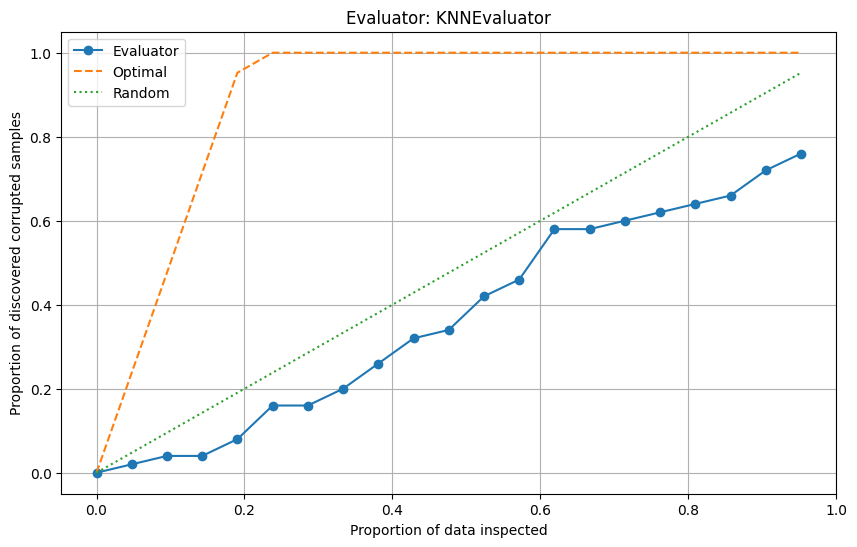

LavaEvaluator: {'found_rates': [0.0, 0.02, 0.06, 0.1, 0.12, 0.16, 0.2, 0.22, 0.22, 0.3, 0.42, 0.48, 0.5, 0.52, 0.58, 0.6, 0.64, 0.72, 0.72, 0.76, 0.76], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


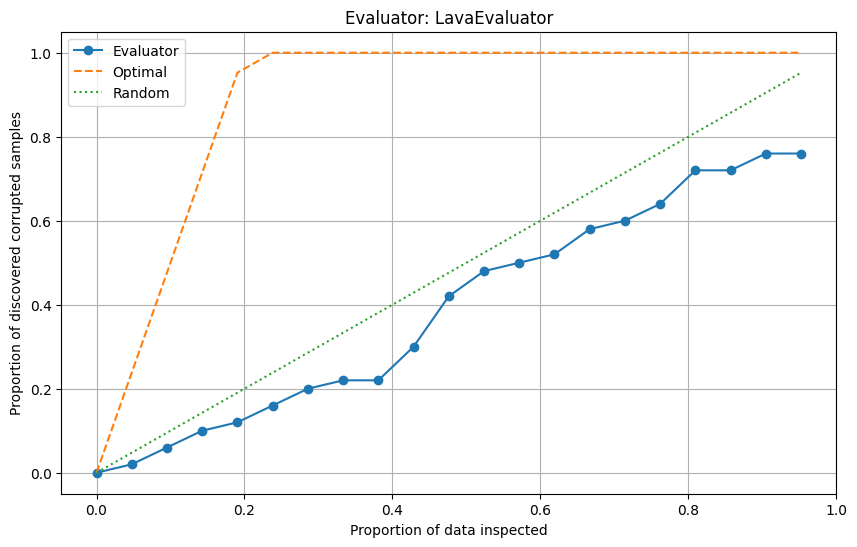

{'KNNEvaluator': {'found_rates': [0.0,
   0.02,
   0.04,
   0.04,
   0.08,
   0.16,
   0.16,
   0.2,
   0.26,
   0.32,
   0.34,
   0.42,
   0.46,
   0.58,
   0.58,
   0.6,
   0.62,
   0.64,
   0.66,
   0.72,
   0.76],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.02,
   0.06,
   0.1,
   0.12,
   0.16,
   0.2,
   0.22,
   0.22,
   0.3,
   0.42,
   0.48,
   0.5,
   0.52,
   0.58,
   0.6,
   0.64,
   0.72,
   0.72,
   0.76,
   0.76],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.142857142

In [8]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner
knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train, y_train, X_test, y_test)
experiment.evaluate(noisy_indices)

In [1]:
!pip install ts2vec


ERROR: Could not find a version that satisfies the requirement ts2vec (from versions: none)
ERROR: No matching distribution found for ts2vec


In [2]:
!pip install sktime
!pip install pytorch-forecasting pytorch-lightning


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/36.8 MB ? eta -:--:--
   ------ --------------------------------- 5.8/36.8 MB 39.0 MB/s eta 0:00:01
   ------------------- -------------------- 17.8/36.8 MB 48.8 MB/s eta 0:00:01
   ---------------------- ----------------- 21.0/36.8 MB 53.0 MB/s eta 0:00:01
   ----------------------------- ---------- 27.3/36.8 MB 38.4 MB/s eta 0:00:01
   ----------------------------- ---------- 27.3/36.8 MB 38.4 MB/s eta 0:00:01
   ---------------------------------------  36.7/36.8 MB 32.4 MB/s eta 0:00:01
   ---------------------------------------- 36.8/36.8 MB 30.3 MB/s eta 0:00:00
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [3]:
import pandas as pd

# Download the Jena Climate dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/jena_climate_2009_2016.csv.zip"
df = pd.read_csv(url, compression='zip')

# Select relevant features
weather_data = df[['T (degC)', 'p (mbar)', 'rh (%)', 'wv (m/s)']]
weather_data.fillna(method='ffill', inplace=True)

print(weather_data.head())


HTTPError: HTTP Error 403: Forbidden

In [4]:
import pandas as pd

# Read the locally downloaded CSV file
df = pd.read_csv("jena_climate_2009_2016.csv")

# Preview the data
print(df.head())
print(df.info())


FileNotFoundError: [Errno 2] No such file or directory: 'jena_climate_2009_2016.csv'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sktime.forecasting.model_selection import temporal_train_test_split

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(weather_data)

# Split into train and test sets (80/20)
y = scaled_data[:, 0]  # Predict temperature
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

print(f"Training data shape: {y_train.shape}")
print(f"Testing data shape: {y_test.shape}")


In [ ]:
from sktime.forecasting.compose import make_reduction
from sklearn.linear_model import Ridge
from sktime.forecasting.base import ForecastingHorizon

# Ridge regressor for simplicity (LSTM can also be used)
ridge_model = make_reduction(Ridge(), window_length=30, strategy="recursive")

# Fit the model
ridge_model.fit(y_train)

# Forecast the next 100 days
fh = ForecastingHorizon([i for i in range(1, 101)], is_relative=True)
y_pred = ridge_model.predict(fh)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label="Actual Temperature")
plt.plot(y_pred, label="Forecasted Temperature", linestyle='dashed')
plt.legend()
plt.title("Temperature Forecast with Ridge Regression (sktime)")
plt.show()


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Create sliding windows
window_size = 30
X_seq, y_seq = [], []

for i in range(len(y_train) - window_size):
    X_seq.append(y_train[i:i+window_size])
    y_seq.append(y_train[i+window_size])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_seq, dtype=torch.float32)
y_tensor = torch.tensor(y_seq, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=64, shuffle=True)


In [ ]:
from torch import nn

class WeatherLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(WeatherLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])  # Take the last hidden state
        return out


model = WeatherLSTM(input_size=1, hidden_size=64, num_layers=2)
model.to('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.unsqueeze(-1).to('cuda')
        batch_y = batch_y.to('cuda')
        
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")


In [ ]:
model.eval()
with torch.no_grad():
    embeddings = model(X_tensor.unsqueeze(-1).to('cuda')).cpu().numpy()

print(f"Embedding shape: {embeddings.shape}")
